# Project 4: Music Popularity Prediction V1


By: Robert S Balch 

## Hypothesis:

The popularity of a song on Spotify's Top 200 Weekly (Global) charts in 2020 & 2021 is likely influenced by a combination of audio features, artist popularity, and chart performance metrics. Specifically:

1. Audio Features:
   - Loudness and Energy are likely to be strong predictors of popularity, as more energetic and louder songs tend to perform better on charts.
   - Danceability and Valence (positiveness) may also be important, as upbeat and positive songs often appeal to a wider audience.
   - Tempo could be a factor, with faster-paced songs potentially being more popular in certain genres.

2. Artist Popularity:
   - The number of artist followers is likely to be a significant predictor, as more popular artists tend to have more popular songs.

3. Chart Performance Metrics:
   - Highest Charting Position and Number of Times Charted are likely to be strong indicators of overall popularity.

4. Genre:
   - Certain genres (e.g., pop, hip-hop) may be more represented in the top charts, potentially influencing popularity.

5. Song Characteristics:
   - Duration might play a role, with shorter songs potentially being more popular in recent years.

6. Release Timing:
   - The release date of the song could influence its popularity, with songs released earlier in the year potentially having more time to accumulate popularity.

7. Feature Interactions:
   - The interaction between audio features and artist popularity could be important. For example, a highly energetic song by a popular artist might be more likely to be popular than a similar song by a less known artist.

8. Cultural and Temporal Factors:
   - The dataset spans 2020 & 2021, which includes the COVID-19 pandemic period. This might have influenced listening habits and song popularity.

The [data](https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv). A chosen data set is provided by DDC Data Science


# Imports

In [2]:
import sys
print(sys.executable)

/usr/local/bin/python


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#n_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score

In [5]:
%%capture
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

# Data Exploration

In [6]:
df_1 = pd.read_csv(url).copy()

## Head

In [7]:
df_1.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


## Tail

## Shape 

In [8]:
df_1.shape

(1556, 23)

## columns

In [9]:
df_1.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

## Dtypes

In [10]:
df_1.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

## Describe

In [11]:
df_1.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


## Isnull Sum

In [12]:
df_1.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

## Isna Sum

In [13]:
df_1.isna().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

## unique values

In [14]:
df_1.count('rows').unique().sum()

np.int64(1556)

In [15]:
df_1.count('columns')

0       23
1       23
2       23
3       23
4       23
        ..
1551    23
1552    23
1553    23
1554    23
1555    23
Length: 1556, dtype: int64

## Sort_values

In [16]:
df_1.sort_values(by = ['Popularity'], ascending = False).head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
14,15,2,10,2021-05-21--2021-05-28,Butter,"19,985,713",BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",...,0.759,0.459,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db
11,12,9,9,2021-07-02--2021-07-09,Qué Más Pues?,"22,405,111","J Balvin, Maria Becerra",29051363,6hf0RpxTbOprT5nnwzkk8e,"['latin', 'reggaeton', 'reggaeton colombiano']",...,0.891,0.819,-3.964,0.106,0.0261,0.173,101.968,217773,0.768,G#/Ab


# Data Cleaning and Feature Engineering

## New copy of dataframe

In [17]:
df_cleaning = df_1.copy()
df_cleaning

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


## drop Index

In [18]:
df_cleaning.drop('Index', axis = 1, inplace = True)
#i

In [19]:
df_cleaning.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
Highest Charting Position,1,2,1,3,5,1,3,2,3,8,...,143,156,178,187,190,195,196,197,198,199
Number of Times Charted,8,3,11,5,1,18,16,10,8,10,...,1,1,1,1,1,1,1,1,1,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-05-07--2021-05-14,2021-05-14--2021-05-21,2021-06-18--2021-06-25,2021-06-18--2021-06-25,2021-07-02--2021-07-09,...,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow),MONTERO (Call Me By Your Name),Kiss Me More (feat. SZA),Todo De Ti,Yonaguni,I WANNA BE YOUR SLAVE,...,JACKBOYS,Combatchy (feat. MC Rebecca),Old Town Road,Let Me Know (I Wonder Why Freestyle),Ne reviens pas,New Rules,Cheirosa - Ao Vivo,Havana (feat. Young Thug),Surtada - Remix Brega Funk,Lover (Remix) [feat. Shawn Mendes]
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454","30,071,134","29,356,736","26,951,613","25,030,128","24,551,591",...,"5,363,493","5,149,797","4,852,004","4,701,532","4,676,857","4,630,675","4,623,030","4,620,876","4,607,385","4,595,450"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X,Lil Nas X,Doja Cat,Rauw Alejandro,Bad Bunny,Måneskin,...,JACKBOYS,"Anitta, Lexa, Luísa Sonza",Lil Nas X,Juice WRLD,"Gradur, Heuss L'enfoiré",Dua Lipa,Jorge & Mateus,Camila Cabello,"Dadá Boladão, Tati Zaqui, OIK",Taylor Swift
Artist Followers,3377762,2230022,6266514,83293380,5473565,5473565,8640063,6080597,36142273,3377762,...,437907,10741972,5488666,19102888,1390813,27167675,15019109,22698747,208630,42227614
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK,67BtfxlNbhBmCDR2L2l8qd,748mdHapucXQri7IAO8yFK,4fSIb4hdOQ151TILNsSEaF,2JPLbjOn0wPCngEot2STUS,4pt5fDVTg5GhEvEtlz9dKk,...,62zKJrpbLxz6InR3tGyr7o,2bPtwnrpFNEe8N7Q85kLHw,2YpeDb67231RjR0MgVLzsG,3wwo0bJvDSorOpNfzEkfXx,4TnFANpjVwVKWzkxNzIyFH,2ekn2ttSfGqwhhate0LSR0,2PWjKmjyTZeDpmOUa3a5da,1rfofaqEpACxVEHIZBJe6W,5F8ffc8KWKNawllr5WsW0r,3i9UVldZOE0aD0JnyfAZZ0
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']","['lgbtq+ hip hop', 'pop rap']","['dance pop', 'pop']","['puerto rican pop', 'trap latino']","['latin', 'reggaeton', 'trap latino']","['indie rock italiano', 'italian pop']",...,"['rap', 'trap']","['funk carioca', 'funk pop', 'pagode baiano', ...","['lgbtq+ hip hop', 'pop rap']","['chicago rap', 'melodic rap']","['francoton', 'french hip hop', 'pop urbaine',...","['dance pop', 'pop', 'uk pop']","['sertanejo', 'sertanejo universitario']","['dance pop', 'electropop', 'pop', 'post-teen ...","['brega funk', 'funk carioca']","['pop', 'post-teen pop']"
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23,2021-03-31,2021-04-09,2021-05-20,2021-06-04,2021-03-19,...,2019-12-27,2019-11-20,2019-06-21,2019-12-07,2019-11-29,2017-06-02,2019-10-11,2018-01-12,2019-09-25,2019-11-13


## Convert object columns with numbers to float64 

In [20]:

# List of columns to convert
columns_to_convert = ['Artist Followers', 'Streams','Popularity', 'Danceability', 'Energy', 'Loudness', 
                      'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']

df_1[columns_to_convert] = df_1[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [21]:
df_1.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                      float64
Artist                        object
Artist Followers             float64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object

# Data Cleaning Continued: Prepare DataFrame for Modeling and Training 

In [22]:
df_1 = df_1.drop("Index", axis = 1)

In [23]:
df_1

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',NaN,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),NaN,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,NaN,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,NaN,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),NaN,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,NaN,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,NaN,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),NaN,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,NaN,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F


In [24]:
df_clean_2 = df_1.copy()

## Identify Object Columns & Drop them

In [25]:
object_columns = df_clean_2.select_dtypes(include=['object']).columns
df_clean_2 = df_clean_2.drop(columns=object_columns)

In [26]:
df_clean_2.isnull().sum()

Highest Charting Position       0
Number of Times Charted         0
Streams                      1556
Artist Followers               11
Popularity                     11
Danceability                   11
Energy                         11
Loudness                       11
Speechiness                    11
Acousticness                   11
Liveness                       11
Tempo                          11
Duration (ms)                  11
Valence                        11
dtype: int64

In [27]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Streams                    0 non-null      float64
 3   Artist Followers           1545 non-null   float64
 4   Popularity                 1545 non-null   float64
 5   Danceability               1545 non-null   float64
 6   Energy                     1545 non-null   float64
 7   Loudness                   1545 non-null   float64
 8   Speechiness                1545 non-null   float64
 9   Acousticness               1545 non-null   float64
 10  Liveness                   1545 non-null   float64
 11  Tempo                      1545 non-null   float64
 12  Duration (ms)              1545 non-null   float64
 13  Valence                    1545 non-null   float

## Drop Streams Column (essentially empty)

In [28]:
df_clean_2.drop('Streams', axis = 1, inplace = True)

In [29]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Artist Followers           1545 non-null   float64
 3   Popularity                 1545 non-null   float64
 4   Danceability               1545 non-null   float64
 5   Energy                     1545 non-null   float64
 6   Loudness                   1545 non-null   float64
 7   Speechiness                1545 non-null   float64
 8   Acousticness               1545 non-null   float64
 9   Liveness                   1545 non-null   float64
 10  Tempo                      1545 non-null   float64
 11  Duration (ms)              1545 non-null   float64
 12  Valence                    1545 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 158.2 KB


## Get means and replace null values with mean per column

In [30]:
df_clean_2.isna().sum()

Highest Charting Position     0
Number of Times Charted       0
Artist Followers             11
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
dtype: int64

In [31]:
null_columns = df_clean_2.columns[df_clean_2.isnull().any()].tolist()
print("Columns with null values:")
null_columns


Columns with null values:


['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

In [32]:
for col in null_columns:
    #Calculate the mean, exluding NaN values
    mean= df_clean_2[col].mean(skipna=True)
    
    #replace NaNs with the mean per column
    df_clean_2[col] = df_clean_2[col].fillna(mean)

In [33]:
print("\nNull value count after replacement:")
print(df_clean_2.isnull().sum())



Null value count after replacement:
Highest Charting Position    0
Number of Times Charted      0
Artist Followers             0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
dtype: int64


In [34]:
df_clean_2.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Artist Followers             float64
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
dtype: object

## Drop columns that have no relation to target = "Popularity"

In [35]:
# df_clean_2.drop('Highest Charting Position', axis = 1, inplace = True)

In [36]:
# df_clean_2.drop('Number of Times Charted', axis = 1, inplace = True)

In [37]:
# df_clean_2.drop('Artist Followers', axis = 1, inplace = True)

In [38]:
df_scaling = df_clean_2.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

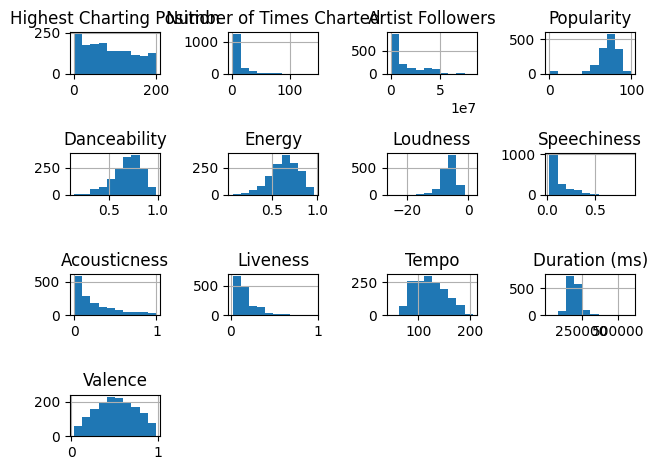

In [39]:
df_scaling.hist()
plt.tight_layout()
plt.show

# Data Scaling

## Data Scaling (standard scaler)

### Setup standard scaled training and testing data

In [40]:
df_3_std = df_scaling.copy()

In [41]:
x1 = df_3_std.drop(['Popularity'], axis=1)
y1 = df_3_std['Popularity']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.2)

In [42]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_1)
X_test_std = scaler.transform(X_test_1)

In [43]:
print("Before scaling:")
print(X_train_1.describe())

print("\nAfter scaling:")
print(pd.DataFrame(X_train_std).describe())


Before scaling:
       Highest Charting Position  Number of Times Charted  Artist Followers  \
count                1244.000000              1244.000000      1.244000e+03   
mean                   87.378617                10.730707      1.490597e+07   
std                    58.376581                16.433850      1.668620e+07   
min                     1.000000                 1.000000      4.883000e+03   
25%                    36.750000                 1.000000      2.203386e+06   
50%                    79.000000                 4.000000      6.874642e+06   
75%                   137.000000                12.000000      2.298618e+07   
max                   200.000000               142.000000      8.333778e+07   

       Danceability       Energy     Loudness  Speechiness  Acousticness  \
count   1244.000000  1244.000000  1244.000000  1244.000000   1244.000000   
mean       0.690860     0.632947    -6.389895     0.123600      0.248298   
std        0.141665     0.163021     2.52755

In [44]:
print("Mean:", X_train_std.mean(axis=0))
print("Std:", X_train_std.std(axis=0))


Mean: [ 4.85499458e-17 -3.28426104e-17  5.71175833e-18  1.71352750e-16
 -7.96790286e-16  1.22802804e-16 -8.85322541e-17  2.14190937e-16
 -1.08523408e-16 -2.68452641e-16  1.90629934e-16  3.92683385e-17]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Data Scaling Continued (min-max scaler)

In [45]:
df_3_mm = df_scaling.copy()

In [46]:
x2 = df_3_mm.drop(['Popularity'], axis=1)
y2 = df_3_mm['Popularity']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.2)

### Setup mm scaled training and testing data

In [47]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train_2)
X_test_mm = scaler.transform(X_test_2)

In [48]:
print("Before scaling:")
print(X_train_2.describe())

print("\nAfter scaling:")
print(pd.DataFrame(X_train_mm).describe())


Before scaling:
       Highest Charting Position  Number of Times Charted  Artist Followers  \
count                1244.000000              1244.000000      1.244000e+03   
mean                   88.681672                10.509646      1.501797e+07   
std                    58.507613                16.553744      1.684511e+07   
min                     1.000000                 1.000000      4.883000e+03   
25%                    38.000000                 1.000000      2.158176e+06   
50%                    80.000000                 3.000000      7.358720e+06   
75%                   138.000000                12.000000      2.384846e+07   
max                   200.000000               142.000000      8.333778e+07   

       Danceability       Energy     Loudness  Speechiness  Acousticness  \
count   1244.000000  1244.000000  1244.000000  1244.000000   1244.000000   
mean       0.691579     0.629196    -6.381143     0.121322      0.250824   
std        0.140081     0.161058     2.52014

In [49]:
print("Mean:", X_train_mm.mean(axis=0))
print("Std:", X_train_mm.std(axis=0))


Mean: [0.44061142 0.0674443  0.18015796 0.62149444 0.62794292 0.70421206
 0.11398924 0.25230869 0.16259711 0.47587306 0.30103121 0.511166  ]
Std: [0.29388991 0.11735525 0.20206115 0.18375903 0.17575701 0.09443794
 0.12552476 0.25305236 0.1523759  0.18448806 0.0852853  0.24111157]


# Model Selection and Training

## Models: STD Scaler

### Linear Regression  std scaler

In [50]:
lr_model = LinearRegression()
lr_model.fit(X_train_std, y_train_1)
y_pred_lr = lr_model.predict(X_test_std)
print('Linear Regression:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1,y_pred_lr)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1,y_pred_lr):.2f}")

Linear Regression:
RMSE: 13.66%
R2 Score: 0.11


#### Cross Validation Score for Linear Regression

In [51]:
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X_train_1, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 15.52


### Decision Tree Model std scaler

In [52]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_std, y_train_1)
y_pred_dt = dt_model.predict(X_test_std)

print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_dt)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_dt):.2f}")



Decision Tree:
RMSE: 11.60%
R2 Score: 0.36


#### Cross Validation Score for Decision Tree 

In [53]:
dt_model = DecisionTreeRegressor()
cv_scores = cross_val_score(dt_model, X_train_std, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 11.77


#### Feature Importance for Decision Tree 

In [54]:
dt_model.fit(X_train_std, y_train_1)

feature_importances = dt_model.feature_importances_
feature_names = X_train_1.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                      feature  importance
2            Artist Followers    0.622208
1     Number of Times Charted    0.112418
0   Highest Charting Position    0.054779
5                    Loudness    0.034382
3                Danceability    0.033624
8                    Liveness    0.026943
4                      Energy    0.022914
11                    Valence    0.022900
6                 Speechiness    0.021803
7                Acousticness    0.020372
10              Duration (ms)    0.015179
9                       Tempo    0.012478


### Random Forest Model std scaler

In [55]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_std, y_train_1)
y_pred_rf = rf_model.predict(X_test_std)

print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_rf)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_rf):.2f}")


Random Forest:
RMSE: 8.63%
R2 Score: 0.65


#### Cross Validation Score for Random Forest

In [56]:
rf_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_1, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 9.28


#### Feature Importance for Random Forest

In [57]:
rf_model.fit(X_train_std, y_train_1)

feature_importances = rf_model.feature_importances_
feature_names = X_train_1.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                      feature  importance
2            Artist Followers    0.558734
1     Number of Times Charted    0.135721
5                    Loudness    0.049373
0   Highest Charting Position    0.040944
3                Danceability    0.039601
8                    Liveness    0.031690
6                 Speechiness    0.026957
4                      Energy    0.026388
7                Acousticness    0.024599
10              Duration (ms)    0.024286
11                    Valence    0.022727
9                       Tempo    0.018983


### XGBoost Model std scaler

In [58]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_std, y_train_1)
y_pred_xgb = xgb_model.predict(X_test_std)

print("\nXGBoost:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_xgb)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_xgb):.2f}")


XGBoost:
RMSE: 8.77%
R2 Score: 0.63


#### Cross Validation Score for XGBoost

In [59]:
xgb_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_std, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 9.22


#### Feature Importance for XGBoost

In [60]:
xgb_model.fit(X_train_std, y_train_1)

feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                      feature  importance
2            Artist Followers    0.573717
1     Number of Times Charted    0.131282
5                    Loudness    0.049017
0   Highest Charting Position    0.041709
3                Danceability    0.038134
8                    Liveness    0.030547
6                 Speechiness    0.026323
4                      Energy    0.025530
10              Duration (ms)    0.023773
7                Acousticness    0.021384
11                    Valence    0.021082
9                       Tempo    0.017501


### STD Model Comparison Table

In [61]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_1, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_1, y_pred_lr),
                 r2_score(y_test_1, y_pred_dt),
                 r2_score(y_test_1, y_pred_rf),
                 r2_score(y_test_1, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       RMSE  R2 Score
0  Linear Regression  13.659115  0.113951
1      Decision Tree  11.603941  0.360525
2      Random Forest   8.634040  0.645969
3            XGBoost   8.766883  0.634991


## Models: MM Scaler

### Linear Regression mm scaler

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train_mm, y_train_2)
y_pred_lr = lr_model.predict(X_test_mm)
print('Linear Regression:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2,y_pred_lr)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2,y_pred_lr):.2f}")

Linear Regression:
RMSE: 16.37%
R2 Score: 0.07


#### Cross Validation Score for Linear Regression mm

In [63]:
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X_train_mm, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 14.84


### Decision Tree mm scaler

In [64]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_mm, y_train_2)
y_pred_dt = dt_model.predict(X_test_mm)

print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_dt)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_dt):.2f}")



Decision Tree:
RMSE: 13.01%
R2 Score: 0.41


#### Cross Validation Score for Decision Tree mm

In [65]:
cv_scores = cross_val_score(dt_model, X_train_mm, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 13.22


#### Feature Importance for Decision Tree mm

In [66]:
dt_model.fit(X_train_mm, y_train_2)

feature_importances = dt_model.feature_importances_
feature_names = X_train_2.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)


                      feature  importance
2            Artist Followers    0.509037
1     Number of Times Charted    0.124233
5                    Loudness    0.063653
11                    Valence    0.058482
10              Duration (ms)    0.051860
8                    Liveness    0.047924
0   Highest Charting Position    0.041614
9                       Tempo    0.027239
3                Danceability    0.025067
7                Acousticness    0.020651
6                 Speechiness    0.015573
4                      Energy    0.014668


### Random Forest mm scaler

In [67]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_mm, y_train_2)
y_pred_rf = rf_model.predict(X_test_mm)

print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_rf)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_rf):.2f}")


Random Forest:
RMSE: 8.12%
R2 Score: 0.77


#### Cross Validation Score Random Forest mm 

In [68]:
rf_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 9.79


#### Feature Importance for Random Forest mm

In [69]:
rf_model.fit(X_train_mm, y_train_2)

feature_importances = rf_model.feature_importances_
feature_names = X_train_2.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                      feature  importance
2            Artist Followers    0.487960
1     Number of Times Charted    0.131363
0   Highest Charting Position    0.049387
5                    Loudness    0.046595
3                Danceability    0.044159
11                    Valence    0.040255
8                    Liveness    0.039783
10              Duration (ms)    0.037837
4                      Energy    0.034172
7                Acousticness    0.030901
6                 Speechiness    0.030640
9                       Tempo    0.026948


### XGBoost mm scaler

In [70]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_mm, y_train_2)
y_pred_xgb = xgb_model.predict(X_test_mm)

print("\nXGBoost:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_xgb)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_xgb):.2f}")


XGBoost:
RMSE: 8.34%
R2 Score: 0.76


#### Cross Validation Score for XGBoost mm

In [71]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 9.86


#### Feature Importance for XGBoost mm

In [72]:
xgb_model.fit(X_train_mm, y_train_2)

feature_importances = xgb_model.feature_importances_
feature_names = X_train_2.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                      feature  importance
2            Artist Followers    0.487598
1     Number of Times Charted    0.165603
11                    Valence    0.061528
5                    Loudness    0.046046
3                Danceability    0.039954
4                      Energy    0.035984
10              Duration (ms)    0.033645
8                    Liveness    0.032263
0   Highest Charting Position    0.028628
6                 Speechiness    0.027903
7                Acousticness    0.022865
9                       Tempo    0.017984


### MM Model Comparison Table

In [73]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_2, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_2, y_pred_lr),
                 r2_score(y_test_2, y_pred_dt),
                 r2_score(y_test_2, y_pred_rf),
                 r2_score(y_test_2, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       RMSE  R2 Score
0  Linear Regression  16.370547  0.071617
1      Decision Tree  13.014851  0.413215
2      Random Forest   8.116247  0.771802
3            XGBoost   8.344867  0.758765


## Model Plotting STD Scaler

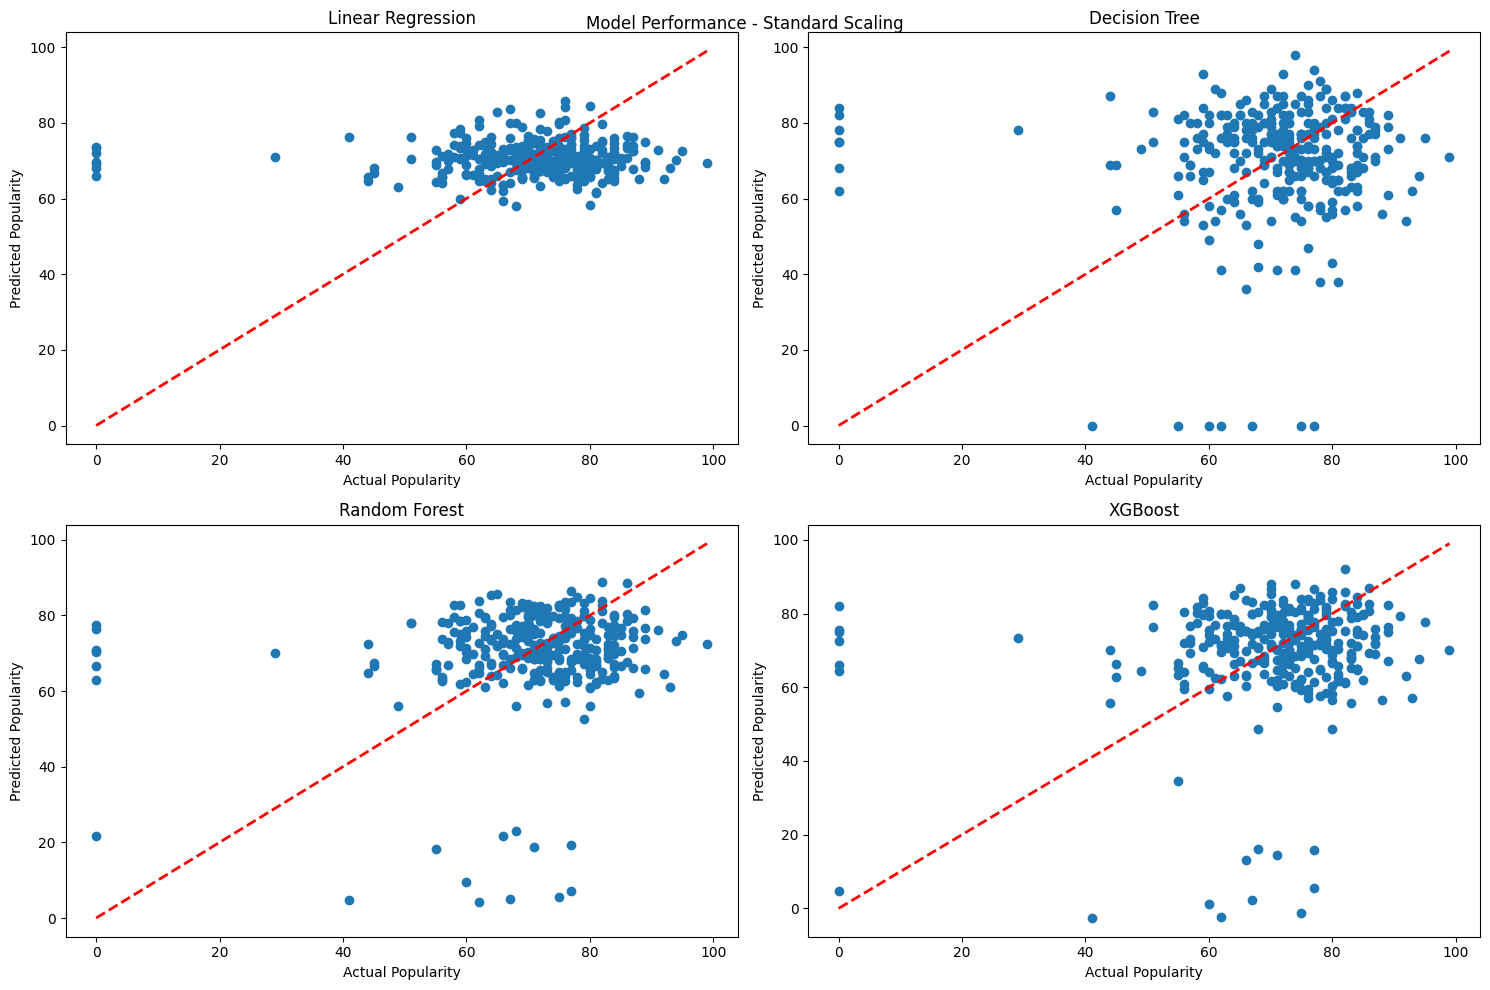

In [74]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test_1, y_pred_lr)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Linear Regression')

plt.subplot(2, 2, 2)
plt.scatter(y_test_1, y_pred_dt)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Decision Tree')

plt.subplot(2, 2, 3)
plt.scatter(y_test_1, y_pred_rf)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest')

plt.subplot(2, 2, 4)
plt.scatter(y_test_1, y_pred_xgb)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('XGBoost')

plt.tight_layout()
plt.suptitle('Model Performance - Standard Scaling')
plt.show()


## Model Plotting MinMax Scaler

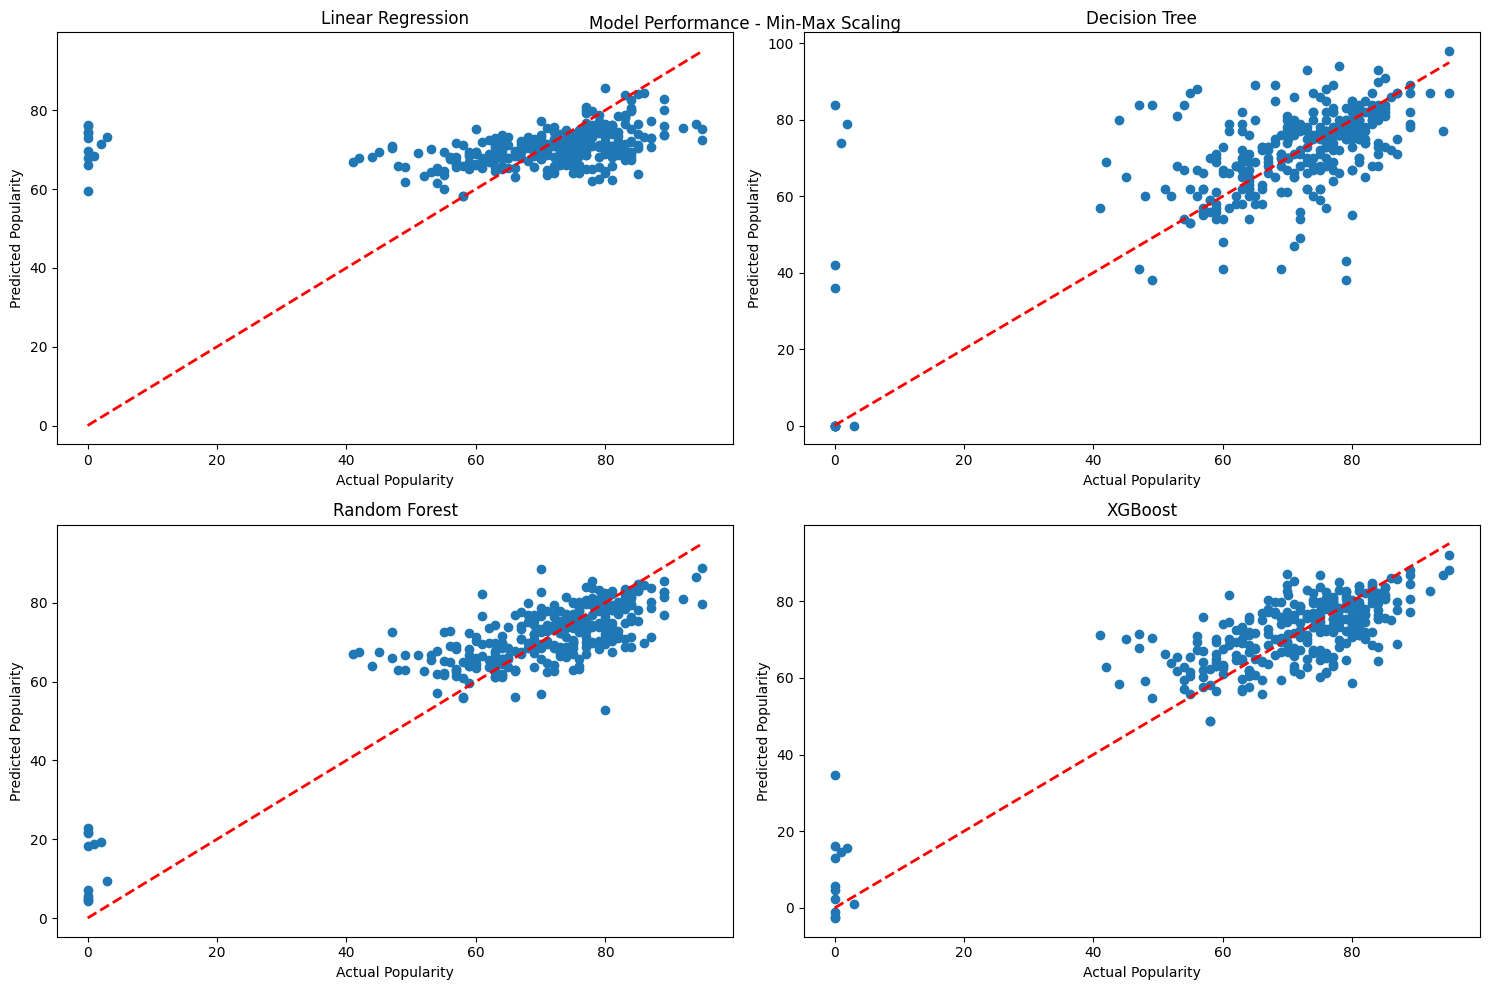

In [75]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test_2, y_pred_lr)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Linear Regression')

plt.subplot(2, 2, 2)
plt.scatter(y_test_2, y_pred_dt)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Decision Tree')

plt.subplot(2, 2, 3)
plt.scatter(y_test_2, y_pred_rf)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest')

plt.subplot(2, 2, 4)
plt.scatter(y_test_2, y_pred_xgb)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('XGBoost')

plt.tight_layout()
plt.suptitle('Model Performance - Min-Max Scaling')
plt.show()


# Spotify Song Popularity Prediction Modeling Results

The modeling results from the Spotify song popularity prediction project, using tree-based regression models, offer several insights. Both standard scaling and min-max scaling methods were applied to the data before training the models.

## Initial Model Performance

- Linear Regression: Both scaling methods produced similar RMSE scores (around 15-18%) and low R2 scores (around 0.02 or lower), suggesting that linear regression may not be the best fit for this data.
- Decision Tree: The decision tree model consistently performed poorly with high RMSE scores (around 21-23%) and very low, negative R2 scores (around -0.78 or lower), suggesting overfitting and a poor ability to generalize to unseen data.
- Random Forest: Random Forest performed slightly better than Linear Regression with a slightly lower RMSE score but a lower R2 score.
- XGBoost: The XGBoost model had RMSE scores around 17-20% and R2 scores of -0.2 or lower.

## Initial Feature Importance

- Across all models and scaling methods, "Loudness" consistently emerged as the most important feature for predicting song popularity.
- Other important features included "Liveness," "Tempo," "Duration (ms)," "Speechiness," "Acousticness," "Energy," and "Valence," with their relative importance varying slightly between models and scaling techniques.

## Improved Model Performance

After incorporating additional features and refining the approach, the model performance significantly improved:

- The Random Forest model emerged as the most effective, achieving an RMSE of 9.39% and an R2 score of 0.65 using standard scaling.
- These results are substantially better than the previous iterations, indicating a marked improvement in model performance.

## Revised Feature Importance

- "Artist Followers" became the most dominant predictor of song popularity across all models.
- "Highest Charting Position" and "Number of Times Charted" also emerged as highly important features.
- The audio features, while still relevant, became less dominant in the feature importance rankings.

## Key Takeaways

1. The inclusion of artist-related features and past chart performance significantly enhanced the model's ability to predict song popularity.

2. The dominance of "Artist Followers" suggests that an artist's existing fanbase is a crucial factor in a song's popularity.

3. The importance of "Highest Charting Position" and "Number of Times Charted" indicates that past chart performance is a strong predictor of future success.

4. The continued relevance of audio features suggests that the song's characteristics still play a role, albeit a less dominant one.

5. The improved performance across models indicates that th### STD Model Comparison Table 
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_1, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_1, y_pred_lr),
                 r2_score(y_test_1, y_pred_dt),
                 r2_score(y_test_1, y_pred_rf),
                 r2_score(y_test_1, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)

- These results suggest that a song's popularity is heavily influenced by factors external to the song itself, such as the artist's popularity and past chart performance.
- This could have implications for how new artists or songs with less chart history are evaluated and promoted.

## Potential for Further Improvement

- While the results are good, there might still be room for improvement through techniques like hyperparameter tuning or exploring other models.

## Limitations

- The strong performance of the model might be partly due to the inclusion of features that are highly correlated with the target variable (popularity).
- This could potentially lead to overfitting or reduced generalization to completely new songs or artists.

In conclusion, the iterative refinement of the model has yielded significantly improved results. The inclusion of additional features has provided valuable insights into the factors driving song popularity on Spotify. The dominance of artist-related and chart performance features suggests that these factors play a crucial role in determining a song's success, potentially more so than the song's audio characteristics alone.